<h1><center> Approximating the Lorenz Model dynamics using a Neural Network</center></h1>

In this notebook I make a comment on a small section of chapter 6 in the book
[Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control by Steven L. Brunton and J. Nathan Kutz](https://www.cambridge.org/core/books/datadriven-science-and-engineering/77D52B171B60A496EAFE4DB662ADC36E)
The book is quite in the topics it covers, but it is a bit sloppy in the mathematical, statistical, and computer science content. Nevertheless, I've found this section interesting. It is in chapter 6.6.

To begin with, let's load some libraries and the dataset (provided by the book's authors):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Implementing  the Lorenz model</h1>

The [Lorenz model](https://en.wikipedia.org/wiki/Lorenz_system) is a reduction done from NS equations. As far as I know, it is an ODE representation of a convective fluid.

For the ode part, I'm following [scipy.integrate.odeint](
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) and for the plotting I learned at [Three-Dimensional Plotting in Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)



In [2]:
def Lorenz(u,t,sigma, beta, rho):
    x,y,z = u
    dudt = [sigma*(y-x),x*(rho-z)-y, x*y - beta*z]

    return dudt 

In [64]:
from scipy.integrate import odeint

t = np.linspace(0,30,2400)
number_points = len(t)
sigma, beta, rho = 10, 8/3, 28
u0 = np.random.randn(3)-.5
sol = odeint(Lorenz,u0,t,args=(sigma, beta,rho))

In [65]:
sol.shape

(2400, 3)

Which looks like

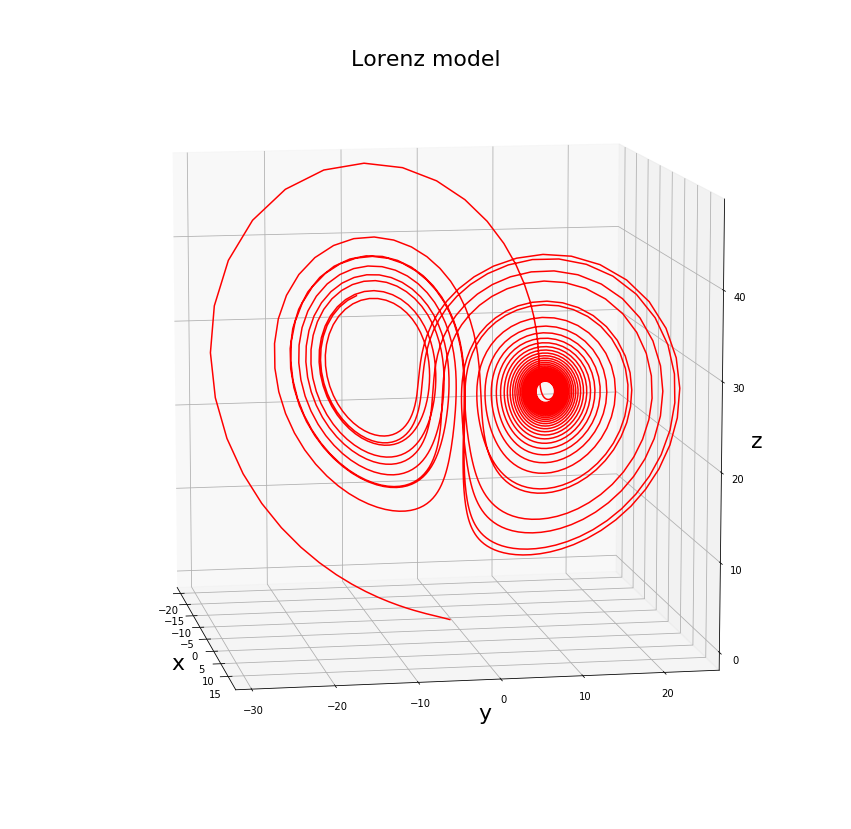

In [66]:
from mpl_toolkits import mplot3d
%matplotlib inline

fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(sol[:,0], sol[:,1], sol[:,2], 'red')
ax.set_title('Lorenz model',fontsize=22)
ax.view_init(10, -10)
ax.set_xlabel('x',fontsize=22)
ax.set_ylabel('y',fontsize=22)
ax.set_zlabel('z',fontsize=22)
plt.show()

In our case we will have to collect data, so we do the following:

In [67]:
def collect_data(N_data):
        
    collecting_points = np.arange(0,number_points,2)
    input_data = np.zeros([1,3])
    output_data = np.zeros([1,3])
    for i in range(N_data):
        u_0 = 30*(np.random.randn(3)- .5)
        sol = odeint(Lorenz,u_0,t,args=(sigma, beta,rho))
        data_points_this_orbit = sol[collecting_points,:]
        input_data=np.append(input_data,data_points_this_orbit[0:-1,:],axis=0) 
        output_data= np.append(output_data,data_points_this_orbit[1:,:],axis=0)
    
    return input_data, output_data

In [68]:
X, Y = collect_data(300)

In [70]:
from mpl_toolkits import mplot3d
%matplotlib inline
from sklearn.utils import shuffle
sample_orbits = shuffle(np.arange(0,300,1))[:50]

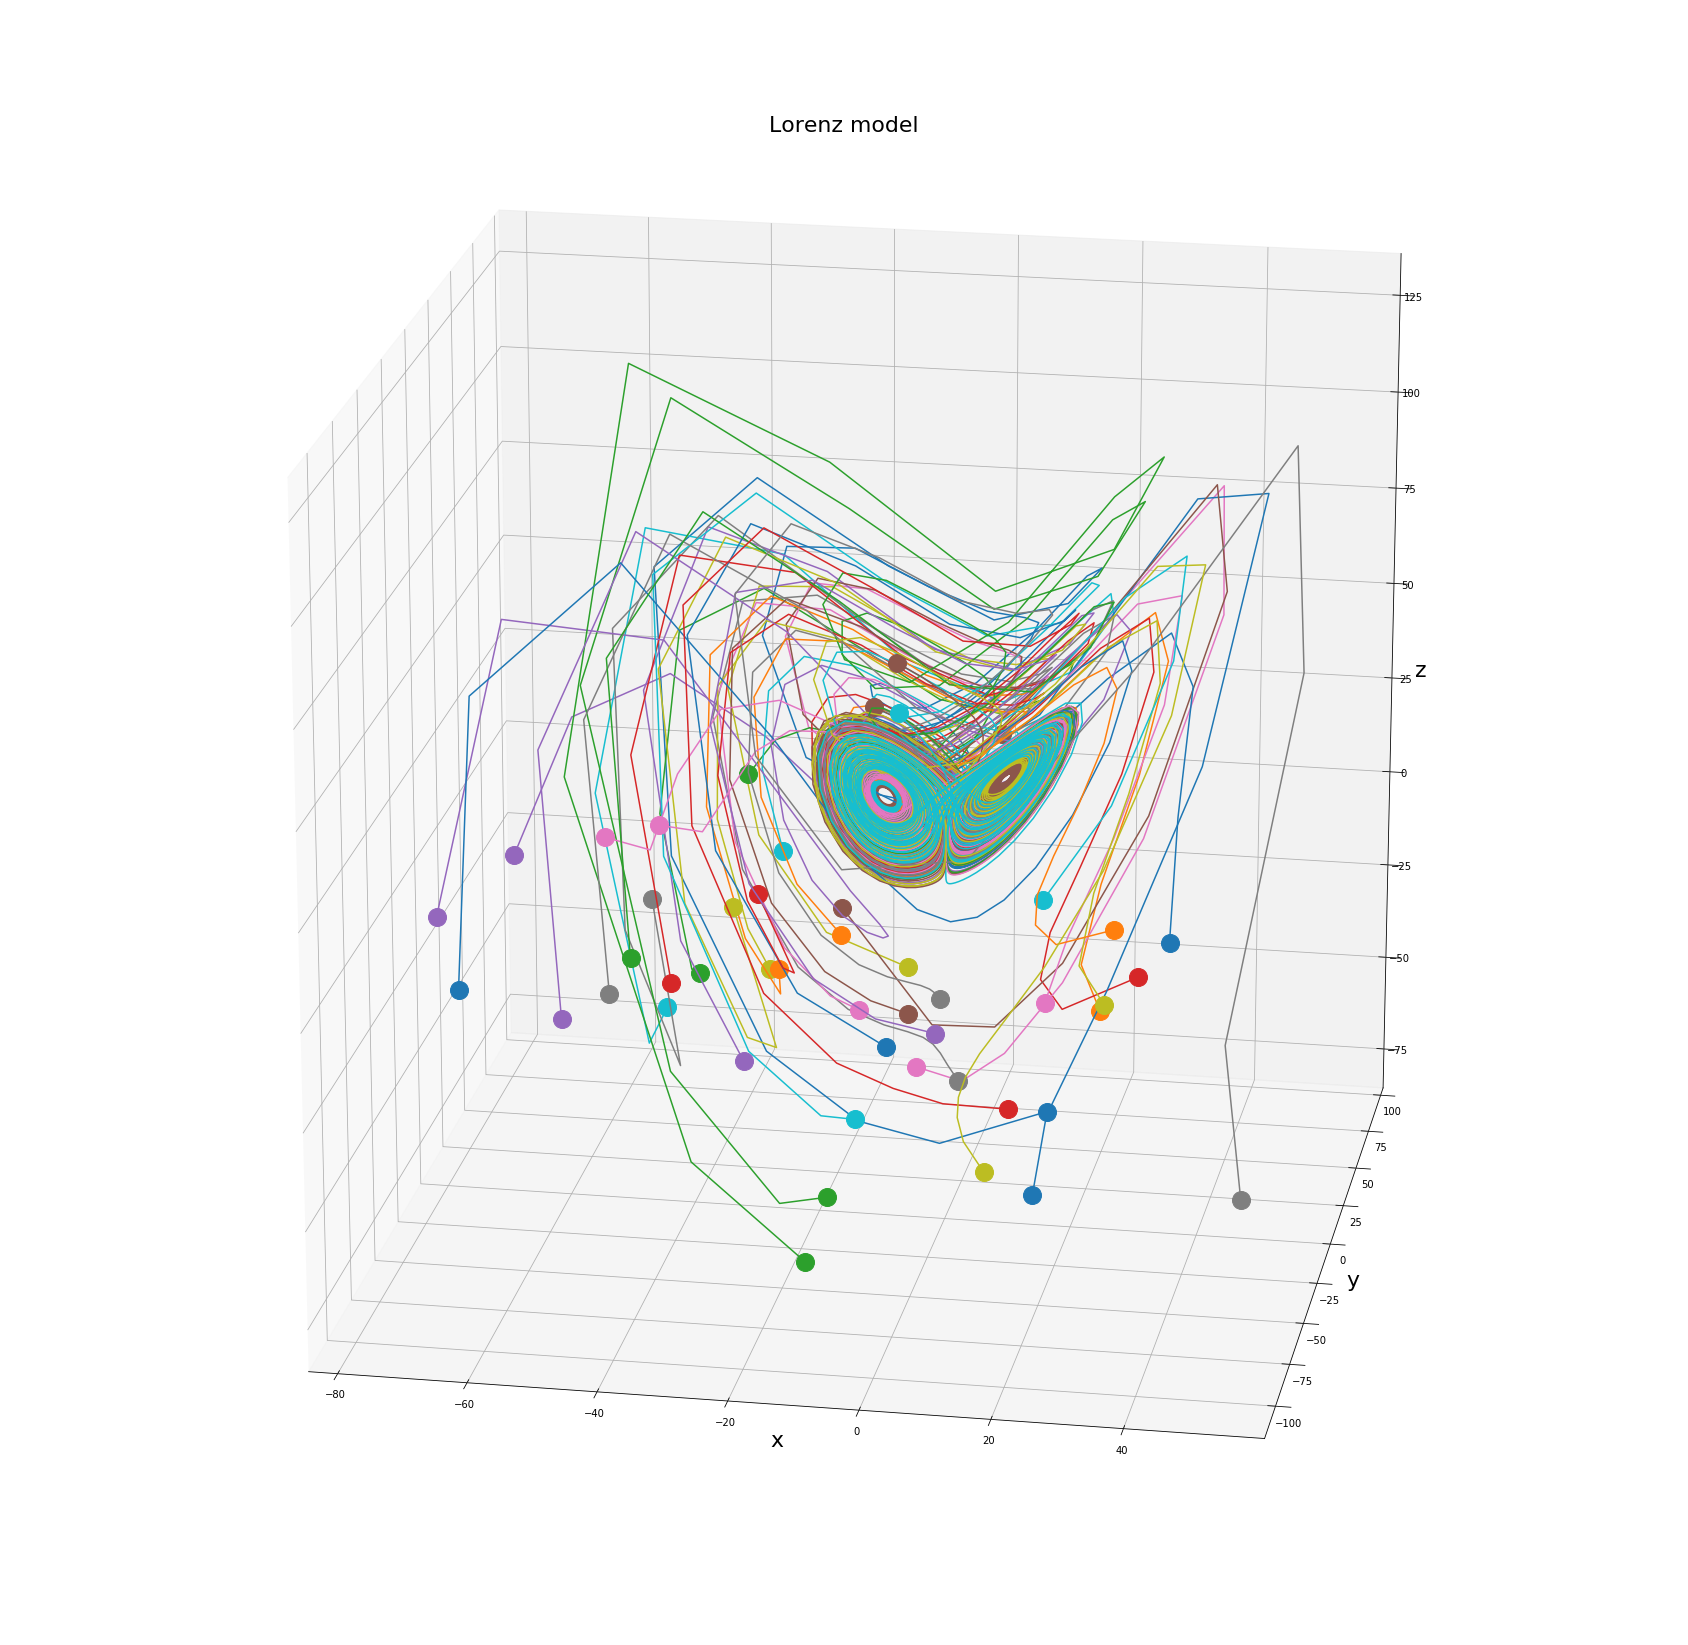

In [71]:

fig = plt.figure(figsize=(30,30))

ax = plt.axes(projection='3d')
collecting_points = np.arange(0,number_points,2)
steps = len(collecting_points)-1

# Data for a three-dimensional line
for j in sample_orbits:
    plt.plot(X[j*steps+1:(j+1)*steps,0], X[j*steps+1:(j+1)*steps,1],\
            X[j*steps+1:(j+1)*steps,2], marker='o',markersize='18',markevery=[0])
    
ax.set_title('Lorenz model',fontsize=22)
ax.view_init(20, -80)
ax.set_xlabel('x',fontsize=22)
ax.set_ylabel('y',fontsize=22)
ax.set_zlabel('z',fontsize=22)
plt.show()

(this is beautiful, isn't it? <3)

<h1> Training a NN with a dynamical system data</h1>

For this part, we shall use [Keras](https://keras.io), which  is a library/method for ML models. The advantage of this approach is enormous when compared to sklearn. however, it is a bit cumbersome to explain how it works. The whole idea is based on graphs of calculations.  


Let's first import this libray:

In [72]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

In this method, computations are seen as graphs, and evaluations on this computations are carried out only when necessary. In a certain way, it goes along the lines of what mathematicians say when they write 
$f(\cdot)$ instead of $f(x)$: the first notation concerns the function $f$, while the latter concerns the value that the function $f$ takes at a point $x$.

In [73]:
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='linear'))

For example, if we want to test thi function we should first create a graph where it is defined, then run it

In [74]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mean_squared_error])

In [75]:
history = model.fit(X, Y, epochs=30, batch_size=100)

Epoch 1/30
359701/359701 [==============================] - 4s 10us/step - loss: 7.0191 - mean_squared_error: 7.0191
Epoch 2/30
359701/359701 [==============================] - 4s 10us/step - loss: 1.3297 - mean_squared_error: 1.3297
Epoch 3/30
359701/359701 [==============================] - 3s 10us/step - loss: 1.0117 - mean_squared_error: 1.0117
Epoch 4/30
359701/359701 [==============================] - 3s 10us/step - loss: 0.8281 - mean_squared_error: 0.8281
Epoch 5/30
359701/359701 [==============================] - 4s 11us/step - loss: 0.7056 - mean_squared_error: 0.7056
Epoch 6/30
359701/359701 [==============================] - 4s 12us/step - loss: 0.6243 - mean_squared_error: 0.6243
Epoch 7/30
359701/359701 [==============================] - 5s 13us/step - loss: 0.5509 - mean_squared_error: 0.5509
Epoch 8/30
359701/359701 [==============================] - 4s 11us/step - loss: 0.4952 - mean_squared_error: 0.4952
Epoch 9/30
359701/359701 [==============================] - 4s 1

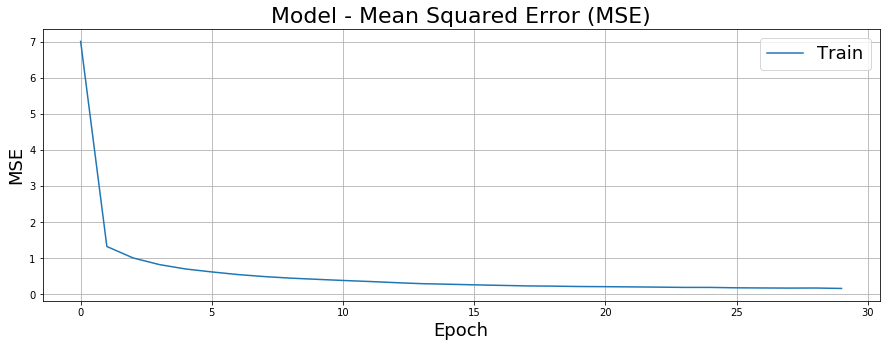

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(history.history['mean_squared_error'])
plt.title('Model - Mean Squared Error (MSE)',size='22')

plt.ylabel('MSE',size='18')
plt.xlabel('Epoch',size='18')
plt.grid(True)
plt.legend(['Train', 'Test'], loc=1,prop={'size': 18})
plt.show()

In [77]:
from scipy.integrate import odeint

t = np.linspace(0,10,3000)
number_points = len(t)
sigma, beta, rho = 10, 8/3, 28
u0 = 30*(np.random.randn(3)-.5)
sol = odeint(Lorenz,u0,t,args=(sigma, beta,rho))

In [78]:
start_at =100
z = np.reshape(sol[start_at,:],(1,-1) )
orbit=np.reshape(z,(1,-1))

for i in range(400):    
    z = model.predict(z)
    #if i% 1 ==0:
    orbit = np.concatenate((orbit,z),axis=0)

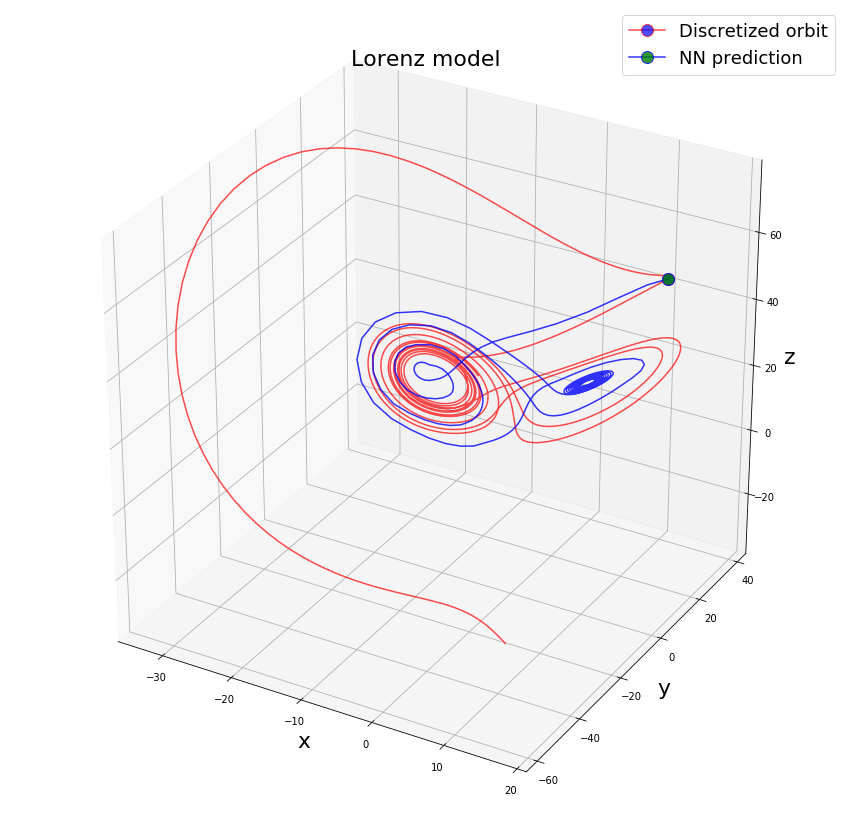

In [80]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

# Data for a three-dimensional plot
ax.plot(sol[:,0], sol[:,1], sol[:,2], 'red', marker='o',markersize='12',markevery=[start_at],markerfacecolor='blue',alpha=.7,label='Discretized orbit')
ax.plot(orbit[:,0], orbit[:,1], orbit[:,2], 'blue', marker='o',markersize='12',markevery=[0],markerfacecolor='green',alpha=0.8,label='NN prediction')

ax.set_title('Lorenz model',fontsize=22)
ax.set_xlabel('x',fontsize=22)
ax.set_ylabel('y',fontsize=22)
ax.set_zlabel('z',fontsize=22)
plt.legend(prop={'size': 18})
plt.show()

Let's take a look on how good (qualitatively)  this approximation is. Recall that the NN is fed only every two steps $\Delta t$, hence we shall compare the approximated orbit only every two points.

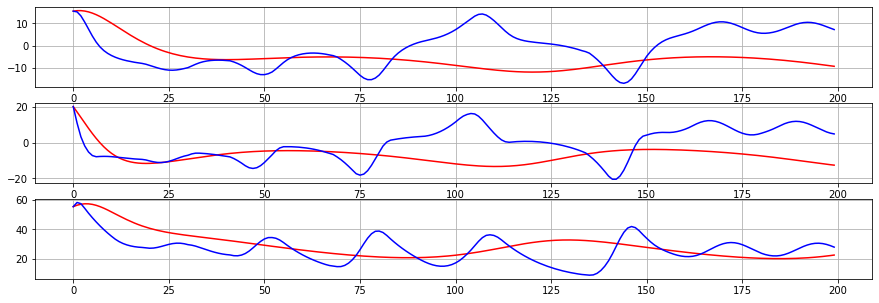

In [81]:
T_max = 200

f, ax= plt.subplots(3,1,figsize=(15,5))
pick_only = np.arange(start_at,start_at+2*T_max,2)
# x coordinate
ax[0].plot(np.arange(T_max),sol[pick_only,0],color='red',label='real solution')
ax[0].plot(np.arange(T_max),orbit[:T_max,0],color='blue',label='approx solution')
ax[0].grid(True)

# y coordinate
ax[1].plot(np.arange(T_max),sol[pick_only,1],color='red',label='real solution')
ax[1].plot(np.arange(T_max),orbit[:T_max,1],color='blue',label='approx solution')
ax[1].grid(True)

# z coordinate
ax[2].plot(np.arange(T_max),sol[pick_only,2],color='red',label='real solution')
ax[2].plot(np.arange(T_max),orbit[:T_max,2],color='blue',label='approx solution')
ax[2].grid(True)

plt.show()

>__Remark:__ it is interesting that, depending on the length of the time interval that we train on,  the discrete dynamics given by the NN approximation seems to speed up the dynamics of the orbits. For instance, if we plot the oribt every 5 points, we see that

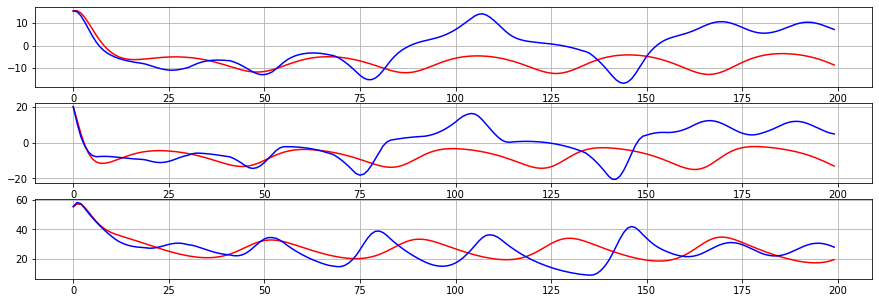

In [82]:
T_max = 200

f, ax= plt.subplots(3,1,figsize=(15,5))
pick_only = np.arange(start_at,start_at+5*T_max,5)
# x coordinate
ax[0].plot(np.arange(T_max),sol[pick_only,0],color='red',label='real solution')
ax[0].plot(np.arange(T_max),orbit[:T_max,0],color='blue',label='approx solution')
ax[0].grid(True)

# y coordinate
ax[1].plot(np.arange(T_max),sol[pick_only,1],color='red',label='real solution')
ax[1].plot(np.arange(T_max),orbit[:T_max,1],color='blue',label='approx solution')
ax[1].grid(True)

# z coordinate
ax[2].plot(np.arange(T_max),sol[pick_only,2],color='red',label='real solution')
ax[2].plot(np.arange(T_max),orbit[:T_max,2],color='blue',label='approx solution')
ax[2].grid(True)

plt.show()